# Explore the data

### Data Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('regression_data.xls')

cities = pd.read_excel('geo-data.xls')

# We add another dataset here in order to change 'zipcode' to 'city' afterwards

data.shape

(21597, 21)

In [3]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

**This dataset has:**
<br />**date:** date which the property was sold
<br />**bedrooms/bathrooms:** nb of bedrooms/bathrooms in the property
<br />**sqft_living:** living room area 
<br />**sqft_lot:** lotsize area
<br />**floors:** which floor the property is in
<br />**waterfront:** the house which has a view to a waterfront 
<br />**view:** *(it is not said how this variable is constructed)*
<br />**condition:** How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.
<br />**grade:** Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.
<br />**sqft_above:** square footage of house apart from the basement
<br />**sqft_basement:** square footage in the basement
<br />**yr_built:** the year the property was built
<br />**yr_renovated:** the year the property was renovated
<br />**zipcode:** where the property is located
<br />**lat/long:** latitude/longtitude of the property
<br />**sqft_living15:** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotSize area
<br />**sqft_lot15:** lotSize area in 2015(implies-- some renovations)
<br />**price:** *our target variable*

At first glance, I would choose to focus on the below variables for my model:
<br />**sqft_living:** *(usually the bigger the living area, the more expensive the property)*
<br />**sqft_lot:** *(usually the bigger the lot, the more expensive the property)*
<br />**floors:** *(usually the middle or highest property are more expensive than those on the basement)*
<br />**waterfront:** *(usually if the property is waterfront, it is more expensive)*
<br />**condition:** *(the higher the more expensive)*
<br />**grade:** *(the higher the more expensive)*
<br />**zipcode:** *(this should be transform to city and then grouped in bins by prices, so at least we have an idea which city is more expensive than the other - a categorical variable which called "location" would help the model)*
<br />**lat/long:** *(latitude/longtitude are also variables which would help locating the property, and help the model predicts more accurately)*
<br />**sqft_living15/sqft_lot15:** *(I would expect the more the renovations, the less expensive the property)*

#### Introducing a new variable to the dataset

In [5]:
# As I said above, I would like to tranform the zipcode into city in order to create bin of city by prices

# Convert dtype of 'zipcode' in 'cities' to the same dtype of 'zipcode' in 'data'
cities['zipcode'] = cities['zipcode'].astype(int)

# Merge 'data' and 'cities' to have column 'city' in our dataset
data = data.merge(cities[['zipcode','city']], how='left',on='zipcode')
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,city
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,Tukwila
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,Seattle
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,Kenmore
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,Seattle
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,Sammamish North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,Seattle
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,Burien
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,Seattle
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,Issaquah


In [6]:
# Adding column 'avg_price_city' to reflect the average house price of that city

sr_location = data.groupby('city')['price'].mean()
data = data.join(sr_location.rename('avg_price_city'),on='city')
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'city', 'avg_price_city'],
      dtype='object')

In [7]:
# Check data types
# Here we see 'bathrooms' shouldn't be float64 but int64

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21597 non-null  int64         
 1   date            21597 non-null  datetime64[ns]
 2   bedrooms        21597 non-null  int64         
 3   bathrooms       21597 non-null  float64       
 4   sqft_living     21597 non-null  int64         
 5   sqft_lot        21597 non-null  int64         
 6   floors          21597 non-null  float64       
 7   waterfront      21597 non-null  int64         
 8   view            21597 non-null  int64         
 9   condition       21597 non-null  int64         
 10  grade           21597 non-null  int64         
 11  sqft_above      21597 non-null  int64         
 12  sqft_basement   21597 non-null  int64         
 13  yr_built        21597 non-null  int64         
 14  yr_renovated    21597 non-null  int64         
 15  zi

### Data Cleaning

In [8]:
pd.set_option('display.max_rows', 40)
pd.set_option('display.min_rows', 20)
pd.set_option('display.expand_frame_repr', True)

In [9]:
# Round nb of bathrooms to unitary values

data['bathrooms'] = data['bathrooms'].apply(lambda x: int(round(x,0)))
data['bathrooms']

0        1
1        2
2        1
3        3
4        2
5        4
6        2
7        2
8        1
9        2
        ..
21587    2
21588    2
21589    2
21590    4
21591    2
21592    2
21593    2
21594    1
21595    2
21596    1
Name: bathrooms, Length: 21597, dtype: int64

In [10]:
# Remove unnecessary columns & drop the 'zipcode'(numerical) as now we have the 'city'(categorical) instead

data = data.drop(columns=['date','zipcode','yr_renovated','yr_built'], axis=1)
data.dtypes

id                  int64
bedrooms            int64
bathrooms           int64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
price               int64
city               object
avg_price_city    float64
dtype: object

In [11]:
data = data.set_index('id')

### EDA

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

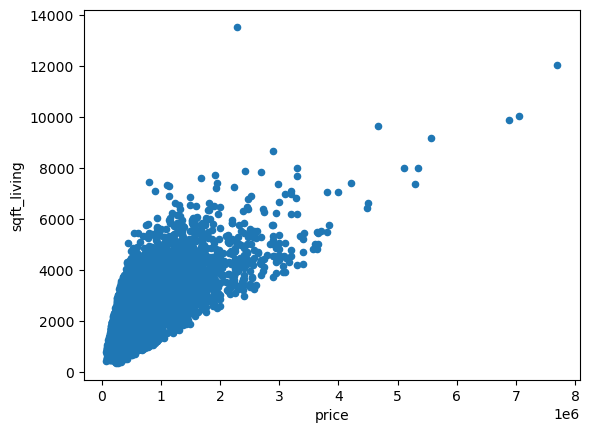

In [12]:
var = 'sqft_living'
relation = pd.concat([data['price'], data[var]], axis=1)
relation.plot.scatter(x='price', y=var)

Here we do see clear positive correlation between the living area and the price

<AxesSubplot:xlabel='price', ylabel='sqft_above'>

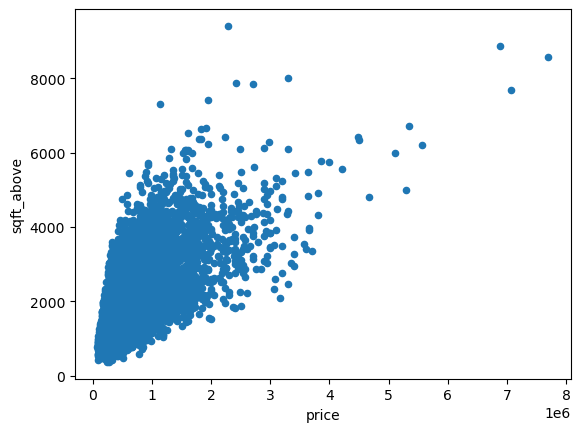

In [13]:
var = 'sqft_above'
relation = pd.concat([data['price'], data[var]], axis=1)
relation.plot.scatter(x='price', y=var)

And same remark for the above basement area

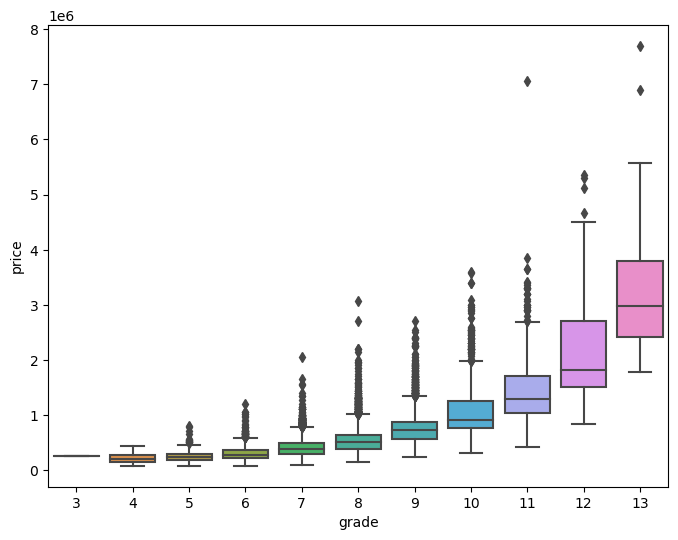

In [14]:
var = 'grade'
relation = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='price', data=relation)

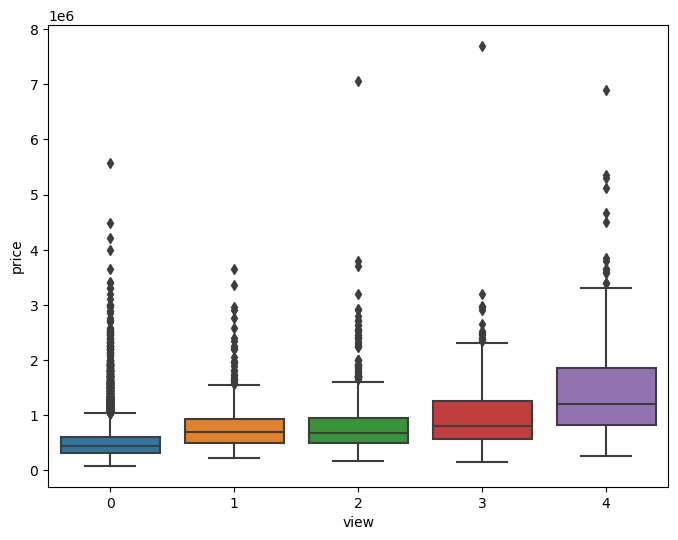

In [15]:
var = 'view'
relation = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='price', data=relation)

Although there are some outliers, we do have a relationship between the price and the view (higher the view, higher the price)

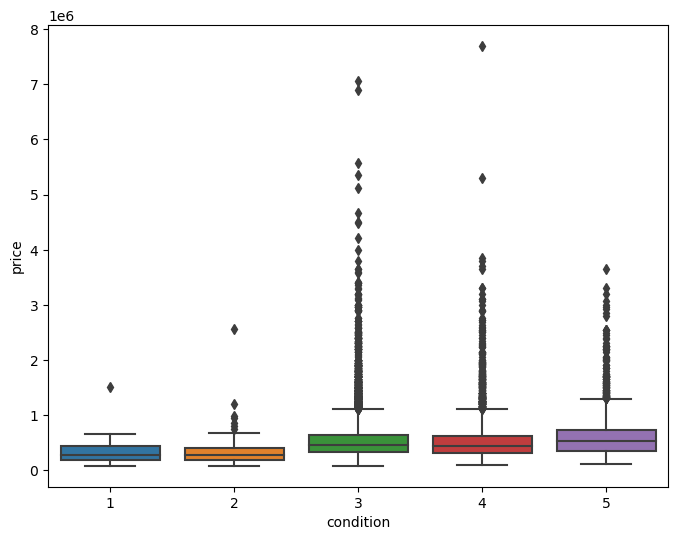

In [16]:
var = 'condition'
relation = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='price', data=relation)

The same can be said for 'condition'

<AxesSubplot:xlabel='price', ylabel='lat'>

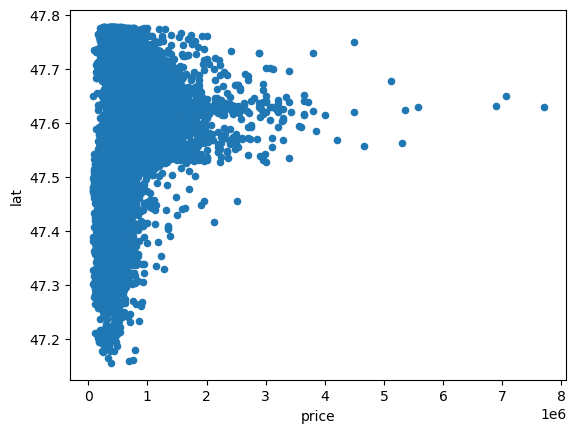

In [17]:
var = 'lat'
relation = pd.concat([data['price'], data[var]], axis=1)
relation.plot.scatter(x='price', y=var)

Prices are the highest for latitude 47.65 ...

<AxesSubplot:xlabel='price', ylabel='long'>

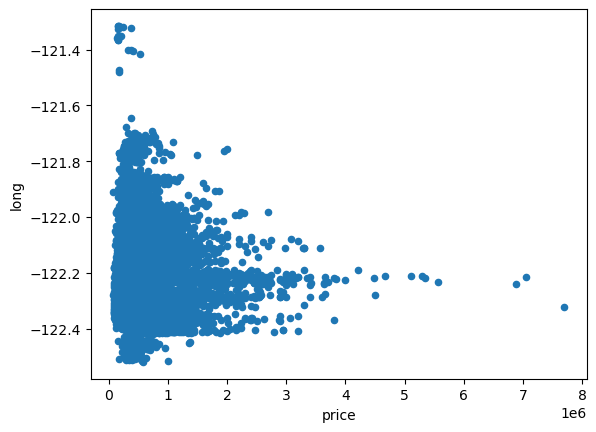

In [18]:
var = 'long'
relation = pd.concat([data['price'], data[var]], axis=1)
relation.plot.scatter(x='price', y=var)

... and for longtitude 122.22

<AxesSubplot:xlabel='long', ylabel='lat'>

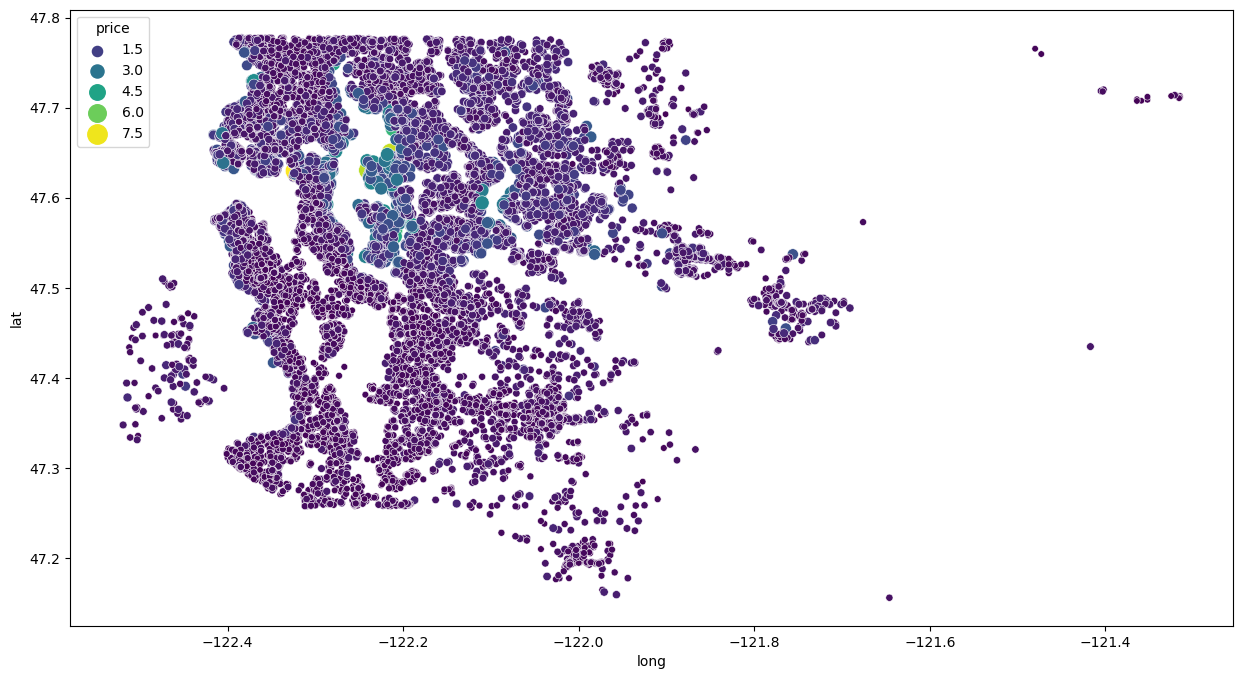

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='long',y='lat',data=data,size='price',hue='price',palette='viridis',sizes=(20,200))

Here we see that houses that are around the water in the middle is the most expensive * obvious *

In [20]:
data.describe().apply(lambda x: round(x,2))

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,avg_price_city
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,3.37,2.06,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,291.73,47.56,-122.21,1986.62,12758.28,540296.57,540296.57
std,0.93,0.75,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,442.67,0.14,0.14,685.23,27274.44,367368.14,208060.04
min,1.00,0.00,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,47.16,-122.52,399.00,651.00,78000.00,234284.04
25%,3.00,2.00,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,47.47,-122.33,1490.00,5100.00,322000.00,403468.46
50%,3.00,2.00,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,47.57,-122.23,1840.00,7620.00,450000.00,594306.55
75%,4.00,2.00,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,47.68,-122.12,2360.00,10083.00,645000.00,612642.74
max,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,47.78,-121.32,6210.00,871200.00,7700000.00,2161300.00


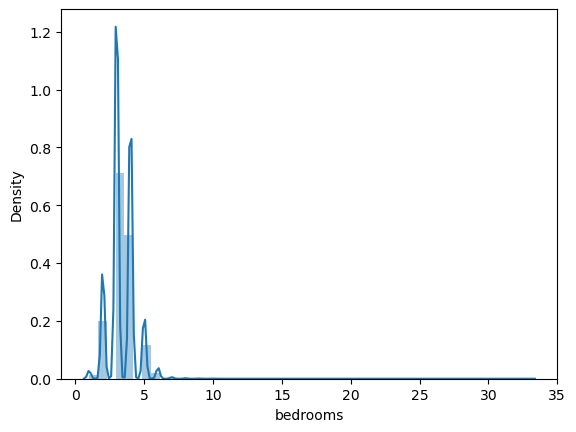

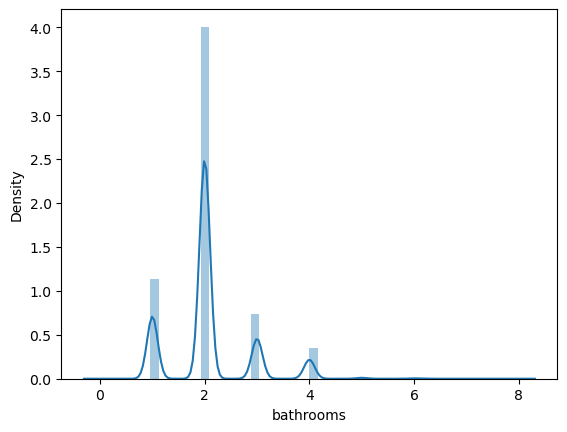

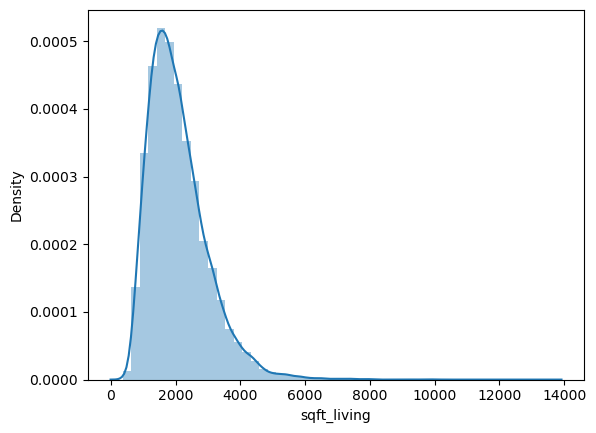

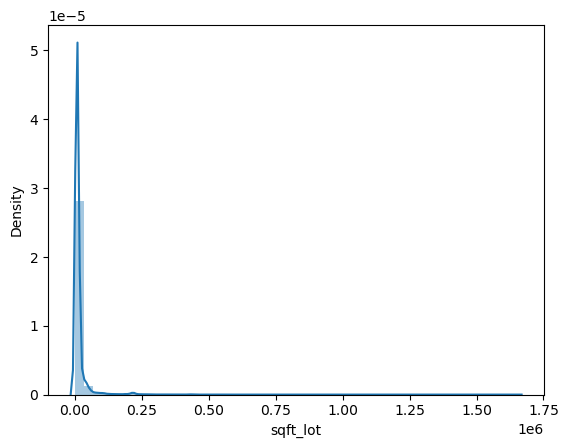

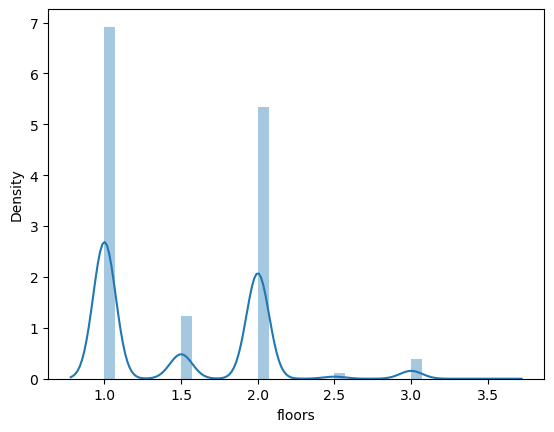

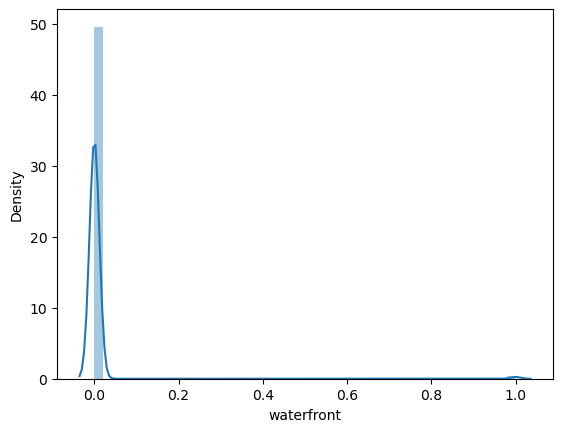

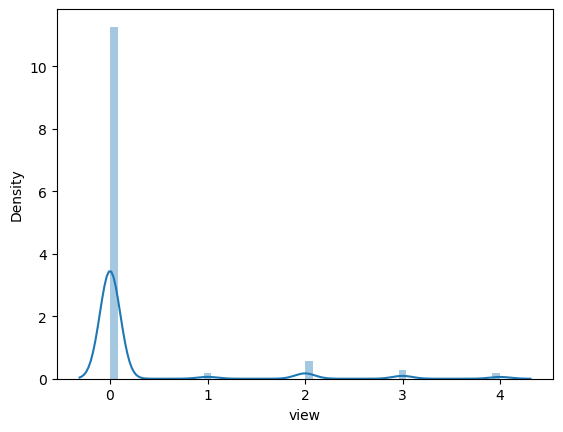

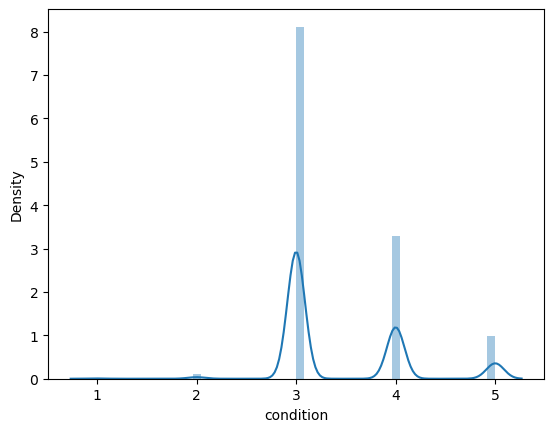

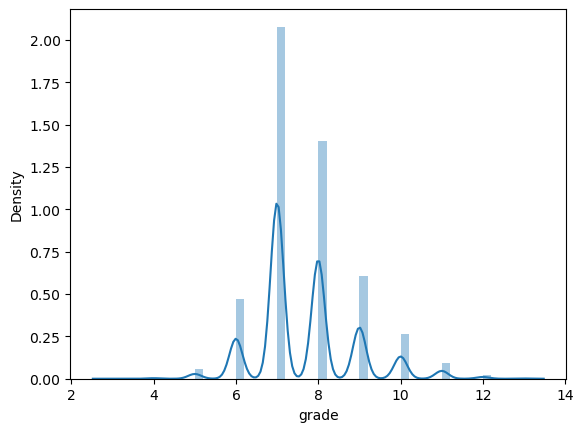

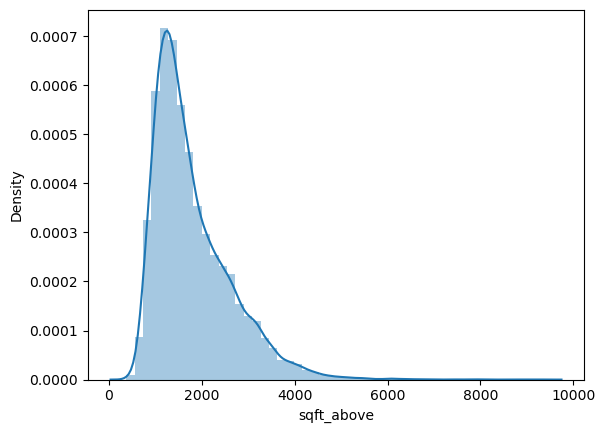

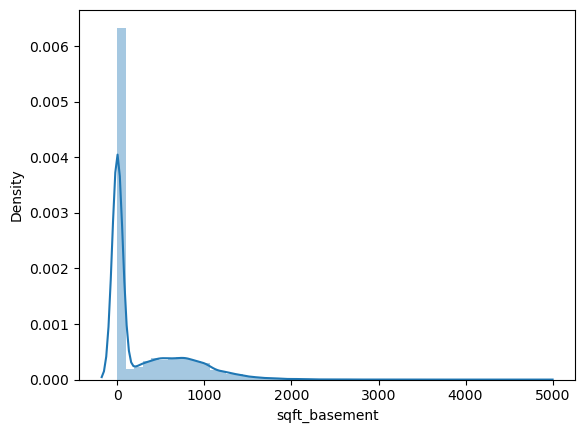

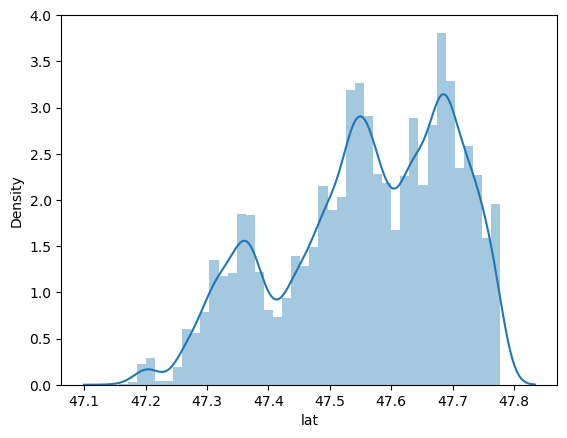

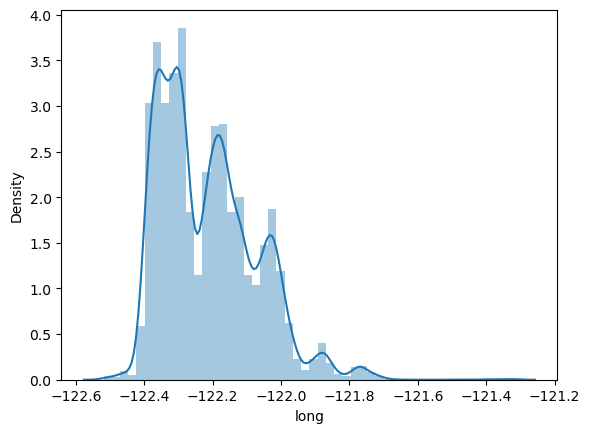

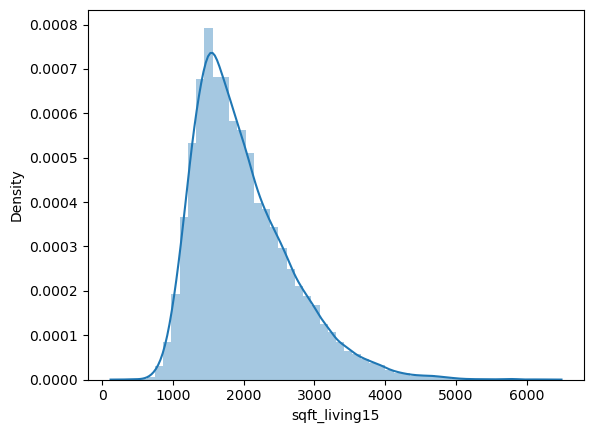

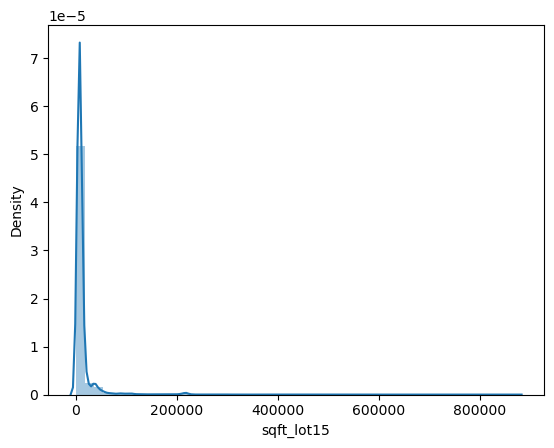

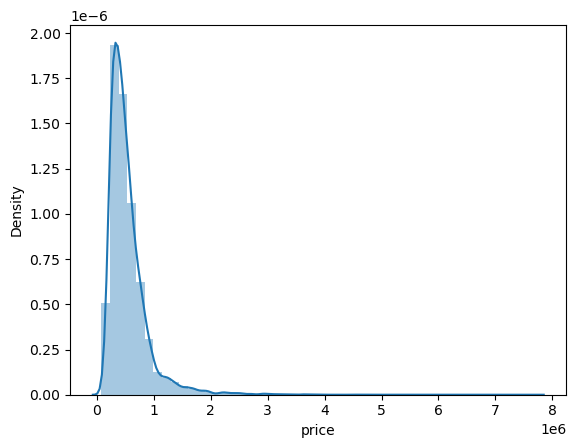

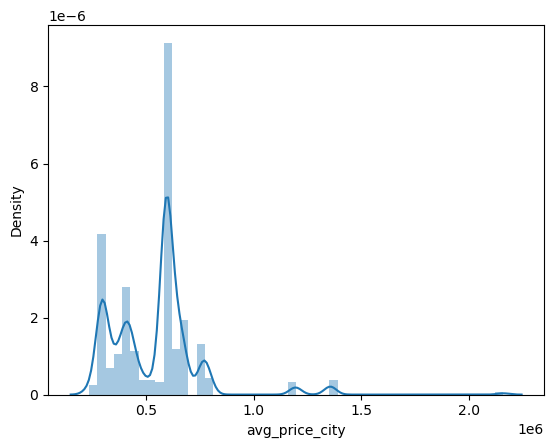

In [21]:
#Use seaborn library to construct distribution plots for the numerical variables
for column in data.select_dtypes(np.number):
    sns.distplot(data[column])
    plt.show()

In [22]:
data.corr().apply(lambda x: round(x,3))

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,avg_price_city
bedrooms,1.000,0.488,0.578,0.032,0.178,-0.007,0.080,0.026,0.357,0.479,0.303,-0.010,0.132,0.393,0.031,0.309,0.105
bathrooms,0.488,1.000,0.703,0.091,0.368,0.065,0.203,-0.068,0.592,0.600,0.335,0.049,0.151,0.499,0.088,0.520,0.194
sqft_living,0.578,0.703,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.876,0.435,0.052,0.241,0.756,0.184,0.702,0.250
sqft_lot,0.032,0.091,0.173,1.000,-0.005,0.022,0.075,-0.009,0.115,0.184,0.015,-0.086,0.230,0.145,0.718,0.090,-0.036
floors,0.178,0.368,0.354,-0.005,1.000,0.024,0.029,-0.264,0.459,0.524,-0.246,0.049,0.126,0.280,-0.011,0.257,0.077
waterfront,-0.007,0.065,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.014,-0.042,0.087,0.031,0.266,0.022
view,0.080,0.203,0.285,0.075,0.029,0.402,1.000,0.046,0.252,0.168,0.277,0.006,-0.078,0.281,0.073,0.397,0.084
condition,0.026,-0.068,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.147,-0.159,0.174,-0.015,-0.106,-0.093,-0.003,0.036,0.039
grade,0.357,0.592,0.763,0.115,0.459,0.083,0.252,-0.147,1.000,0.756,0.168,0.114,0.200,0.714,0.121,0.668,0.309
sqft_above,0.479,0.600,0.876,0.184,0.524,0.072,0.168,-0.159,0.756,1.000,-0.052,-0.001,0.345,0.732,0.195,0.605,0.196


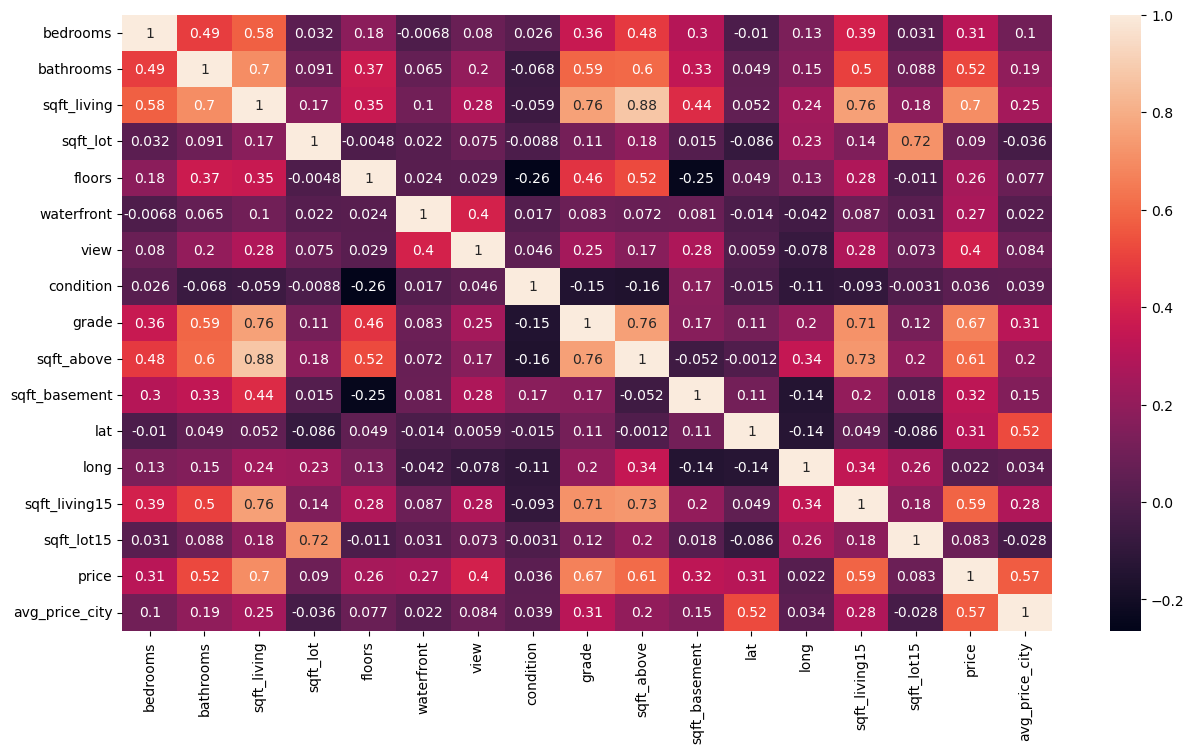

In [23]:
corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [24]:
data.corr()['price'].sort_values(ascending=False)

price             1.000000
sqft_living       0.701917
grade             0.667951
sqft_above        0.605368
sqft_living15     0.585241
avg_price_city    0.566353
bathrooms         0.519628
view              0.397370
sqft_basement     0.323799
bedrooms          0.308787
lat               0.306692
waterfront        0.266398
floors            0.256804
sqft_lot          0.089876
sqft_lot15        0.082845
condition         0.036056
long              0.022036
Name: price, dtype: float64

### Feature Engineering

In [25]:
data1 = data.copy()

#### Train - test split

In [26]:
X = data1.drop(['price'], axis=1)
y = data1['price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

#### Standard Scaler

In [29]:
import pickle

transformer = StandardScaler()
transformer.fit(X_train_num)

# saving in a pickle
with open('std_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_ = loaded_transformer.transform(X_train_num)
X_test_ = loaded_transformer.transform(X_test_num)

# if you need to un-scale afterwards, speacially if you scaled target variable:
unscaled_X_train = loaded_transformer.inverse_transform(X_train_)

# it makes sense to scale the target variable as well
unscaled_X_train[0][0]

3.0

#### Dummifying

In [30]:
data1['waterfront'] = data1['waterfront'].apply(lambda x: 'inland' if x == 0 else 'nearwater')
data1.waterfront

id
7129300520    inland
6414100192    inland
5631500400    inland
2487200875    inland
1954400510    inland
7237550310    inland
1321400060    inland
2008000270    inland
2414600126    inland
3793500160    inland
               ...  
7852140040    inland
9834201367    inland
3448900210    inland
7936000429    inland
2997800021    inland
263000018     inland
6600060120    inland
1523300141    inland
291310100     inland
1523300157    inland
Name: waterfront, Length: 21597, dtype: object

In [31]:
data1 = data1.join(pd.get_dummies(data1.waterfront)).drop(['waterfront'],axis=1)
data1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,city,avg_price_city,inland,nearwater
id,,,,,,,,,,,,,,,,,,,
1000102,6,3,2400,9373,2.0,0,3,7,2400,0,47.3262,-122.214,2060,7316,280000,Auburn,234284.035176,1,0
1000102,6,3,2400,9373,2.0,0,3,7,2400,0,47.3262,-122.214,2060,7316,280000,Auburn,234284.035176,1,0
1000102,6,3,2400,9373,2.0,0,3,7,2400,0,47.3262,-122.214,2060,7316,300000,Auburn,234284.035176,1,0
1000102,6,3,2400,9373,2.0,0,3,7,2400,0,47.3262,-122.214,2060,7316,300000,Auburn,234284.035176,1,0
1200019,4,2,2060,26036,1.0,0,4,8,1160,900,47.4444,-122.351,2590,21891,647500,Normandy park,431439.475884,1,0
1200021,3,1,1460,43000,1.0,0,3,7,1460,0,47.4434,-122.347,2250,20023,400000,Normandy park,431439.475884,1,0
2800031,3,1,1430,7599,1.5,0,4,6,1010,420,47.4783,-122.265,1290,10320,235000,Tukwila,294841.422040,1,0
3600057,4,2,1650,3504,1.0,0,3,7,760,890,47.5803,-122.294,1480,3504,402500,Seattle,594306.550110,1,0
3600072,4,3,2220,5310,1.0,0,5,7,1170,1050,47.5801,-122.294,1540,4200,680000,Seattle,594306.550110,1,0


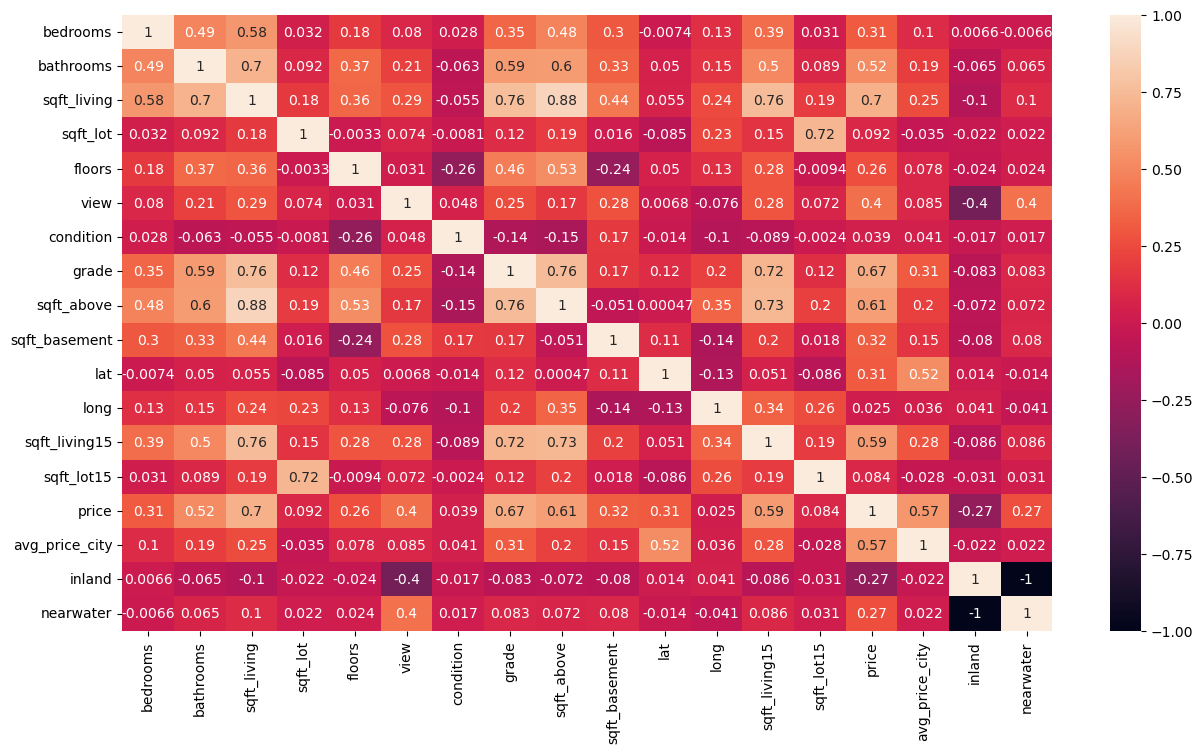

In [32]:
corr_matrix=data1.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Training the model

#### Linear Regression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train_num, y_train)

LinearRegression()

In [35]:
model.score(X_test_num, y_test)

0.7394939117646591

In [36]:
predictions = model.predict(X_test_num)

In [37]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.7394939117646591, 113636.86222453412, 193581.2051242878)

Check and remove some features to test

In [38]:
model.coef_

array([-2.71791497e+04,  1.82067865e+04,  1.13634582e+02,  3.23840978e-01,
       -1.76112598e+04,  6.22014434e+05,  5.91797600e+04,  4.04118768e+04,
        5.83598256e+04,  8.48412685e+01,  2.87933134e+01,  1.88671977e+05,
       -3.13074598e+05,  1.31354615e+00, -3.41471836e-01,  6.13593096e-01])

In [39]:
model.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'avg_price_city'], dtype=object)

In [40]:
cols_to_remove = pd.DataFrame([abs(i) for i in model.coef_], index=model.feature_names_in_, columns=['coef']).sort_values('coef', ascending=False).tail(2).index
cols_to_remove

Index(['sqft_lot15', 'sqft_lot'], dtype='object')

Remove the above features

In [41]:
X = data.drop(cols_to_remove, axis=1).drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

model = LinearRegression()
model.fit(X_train_num, y_train)

# this R2 is very similar to the result of the previous model in which we used these 40 extra columns
model.score(X_test_num, y_test)

0.7472478914353563

Conclusion: The model performs worse than before. I shouldn't remove them

#### KNN - K Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_num, y_train)

KNeighborsRegressor(n_neighbors=10)

In [43]:
knn.score(X_test_num, y_test)

0.7430534654723944

In [51]:
predictions = knn.predict(X_test_num)

In [52]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.7430534654723944, 97195.82953703705, 182916.98093456234)

I actually tried all numbers here and turned out number of neighbors = 10 gives the best score

#### Random Forest Regression

In [46]:
forest = RandomForestRegressor()

In [47]:
forest.fit(X_train_num, y_train)

RandomForestRegressor()

In [48]:
forest.score(X_test_num, y_test)

0.8761736044811579

In [49]:
predictions = forest.predict(X_test_num)

In [50]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8761736044811579, 70840.06004772561, 126981.15058667035)

### Conclusion

After running 3 models: Linear Regression, KNN and Random Forest Regressor, it's clear that the last model is the most robust, and the KNN model performs not that well.